<a href="https://colab.research.google.com/github/nguyentrituan/portfolio_data_science/blob/main/K_means_demo_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Business Understanding**


Bạn vừa được tuyển dụng vào vị trí trưởng phòng Marketing của công ty X là công ty chuyên về hóa mỹ phẩm. Ngay tuần đầu tiên đi làm, giám đốc mời bạn lên và nói rằng: “Chiến lược quảng bá các sản phẩm của công ty hiện tại chưa đem lại hiệu quả cao. Nhiệm vụ của anh/chị là đưa ra giải pháp giúp cải thiện hiệu quả quảng bá, từ đó giúp tăng doanh thu bán hàng, cải thiện mức độ hài lòng của khách hàng”
Sau khi đặt ra các câu hỏi cụ thể cho sếp và tự bản thân tìm hiểu => bạn xác định được vấn đề: Hiện tại khách hàng của công ty chưa được phân khúc cụ thể => cần phân khúc khách hàng => Cải thiện hiệu quả quảng bá => tăng doanh thu bán hàng, cải thiện mức độ hài lòng của khách hàng


In [ ]:
# Tải các thư viện cần thiết
import pandas as pd
import numpy as np
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
 #Hiển thị số thập phân thay cho science math number
numpy.set_printoptions(suppress=True)

Step 2: Data Understading/ Acquire

Từ yêu cầu đã xác định: bạn xem xét các dữ liệu mà công ty đang có và thấy rằng công ty hiện tại có lưu trữ thông tin khách hàng trên hệ thống máy chủ. Và bạn liên hệ bộ phận quản lý dữ liệu để lấy về.
Dữ liệu khách hàng hiện có 1000 mẫu chứa thông tin income, age, gender


Step 3: Data preparation/ Prepare

Data Consolidation: hợp nhất dữ liệu từ các nguồn, lựa chọn các dữ liệu phù hợp

In [ ]:
data = pd.read_csv('ageinc_g.csv', index_col=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  1000 non-null   int64 
 1   age     1000 non-null   int64 
 2   gender  1000 non-null   object
dtypes: int64(2), object(1)
memory usage: 31.2+ KB


In [ ]:
data.head()

,income,age,gender
0,101743,58,Female
1,49597,27,Female
2,36517,52,Male
3,33223,49,Male
4,72994,53,Female


Data Cleaning: kiểm tra xem có dữ liệu không liên quan, dữ liệu null, dữ liệu outlier, hay không? => Nếu có thì xử lý.
* Dataset có 3 cột là income, age, gender đều cần thiết để giải quyết bà
i toán => dữ liệu đã liên quan.
* Kiểm tra dữ liệu null:

In [ ]:
# kiểm tra dữ liệu null
print(data.isnull().sum()) # => Không có dữ liệu null

income    0
age       0
gender    0
dtype: int64


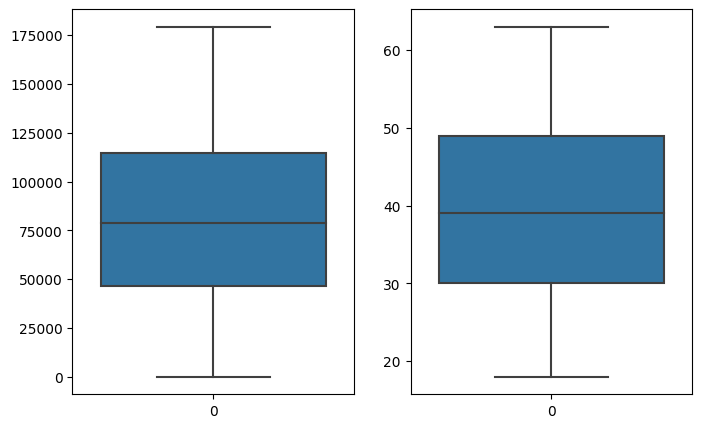

In [ ]:
# Trực quan hóa dữ liệu cho từng biến liên tục
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.boxplot(data.income, orient="v")
plt.subplot(1,2,2)
sns.boxplot(data.age, orient="v")
plt.show()
# => Cả hai biến liên tục income và age đều không có outlier

Data Transformation: chuẩn hóa dữ liệu, bổ sung thuộc tính mới

Dataset có cột gender: là thuộc tính phân loại kiểu chuỗi => tạo cột p
hân loại kiểu số

In [ ]:
data = pd.get_dummies(data, drop_first=True)

In [ ]:
data.head()

,income,age,gender_Male
0,101743,58,0
1,49597,27,0
2,36517,52,1
3,33223,49,1
4,72994,53,0


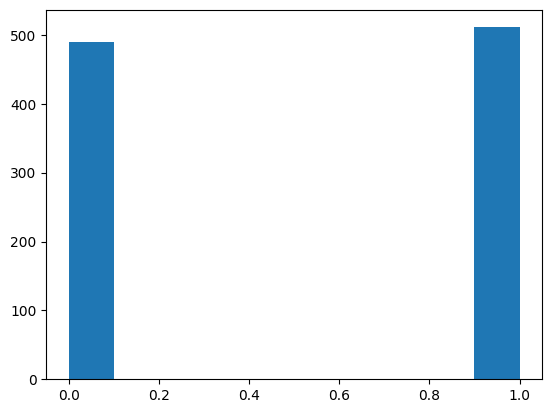

In [ ]:
plt.hist(data.gender_Male)
plt.show()

* Customer Segmentation là một bài toán phân nhóm dựa trên sự tương tự v
ề các thuộc tính và sẽ tính khoảng cách để biết mẫu này “gần” mẫu kia ha
y không bằng công thức tính khoảng cách Euclide
* Đối với các thuật toán cần tính khoảng cách thì dữ liệu trên các cột p
hải đảm bảo tính công bằng khi tính toán. Tuy nhiên, quan sát thấy incom
e và age có range dữ liệu khác biệt, chênh lệch nhiều => cần phải chuẩn
 hóa dữ liệu.
* Muốn chuẩn hóa dữ liệu: cần kiểm tra phân phối của dữ liệu.

<ipython-input-14-d4feaca1bbb5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.income)
<ipython-input-14-d4feaca1bbb5>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


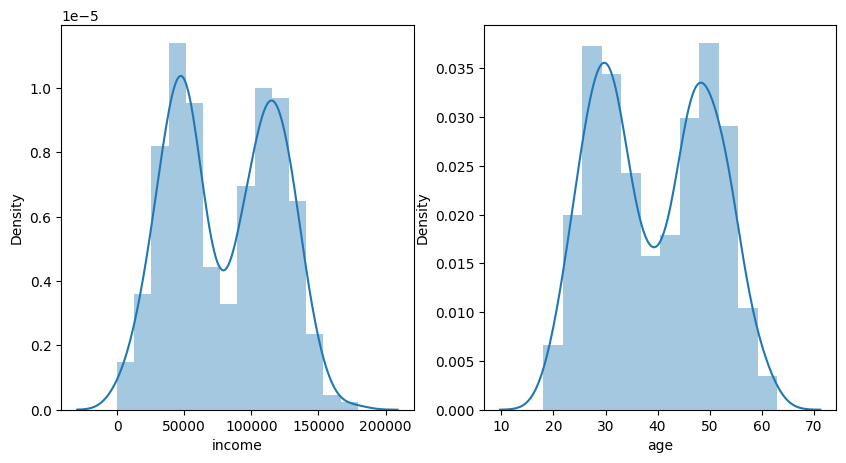

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.distplot(data.income)
plt.subplot(1, 2, 2)
sns.distplot(data.age)
plt.show()

In [ ]:
data.skew()

income         0.028753
age            0.049110
gender_Male   -0.044077
dtype: float64

In [ ]:
data.kurtosis()

income        -1.210079
age           -1.262649
gender_Male   -2.002065
dtype: float64

Từ những kết quả trên ta thấy:

         * Dữ liệu không theo phân phối Gaussian
         * Dữ liệu không có outlier
         => Dùng MinMaxScaler để chuẩn hóa

In [ ]:
mmScaler = MinMaxScaler()
mmScaler.fit(data[['income', 'age']])
data_sub = mmScaler.transform(data[['income', 'age']])

In [ ]:
data_sub

array([[0.56746461, 0.88888889],
       [0.27662387, 0.2       ],
       [0.20367107, 0.75555556],
       ...,
       [0.23538434, 0.37777778],
       [0.0946769 , 0.28888889],
       [0.69080393, 0.57777778]])

In [ ]:
data_sub_min_max_scaler = pd.DataFrame(data_sub,columns=['mm_income', 'mm_age'])
data = pd.concat([data.reset_index(drop=True), data_sub_min_max_scaler], axis=1)

In [ ]:
data.head()

,income,age,gender_Male,mm_income,mm_age
0,101743,58,0,0.567465,0.888889
1,49597,27,0,0.276624,0.200000
2,36517,52,1,0.203671,0.755556
3,33223,49,1,0.185299,0.688889
4,72994,53,0,0.407119,0.777778


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   income       1000 non-null   int64  
 1   age          1000 non-null   int64  
 2   gender_Male  1000 non-null   uint8  
 3   mm_income    1000 non-null   float64
 4   mm_age       1000 non-null   float64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 32.4 KB


Data Reduction: lựa chọn các biến phù hợp => đưa vào huấn luyện
* Trong bài toán này: sẽ dùng inputs là: mm_income, mm_age [, gender_Mal
e]

Step 4: Modeling & Evaluation/ Analyze & Report

Analyze

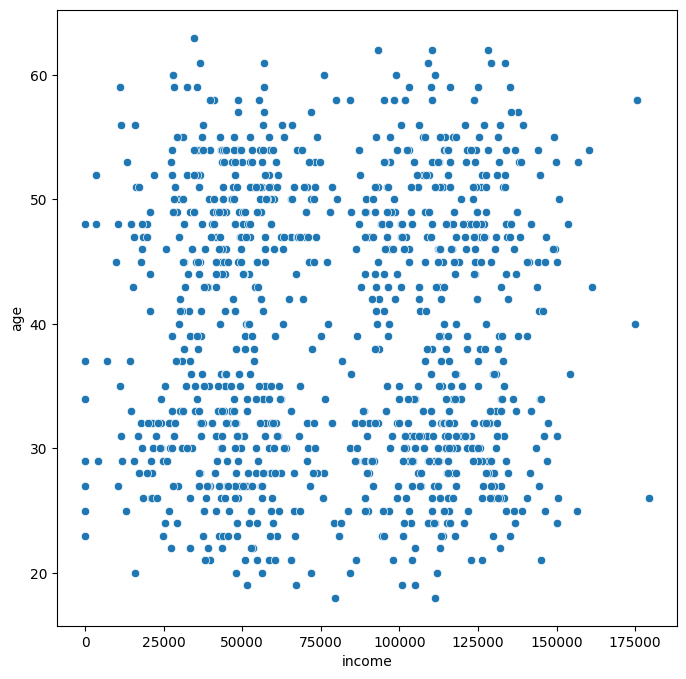

In [ ]:
# Trực quan hóa dữ liệu để có cái nhìn ban đầu về việc phân nhóm # Income & Age
plt.figure(figsize=(8,8))
sns.scatterplot(data=data, x='income', y='age')
plt.show()

In [ ]:
# Income, Age, Gender

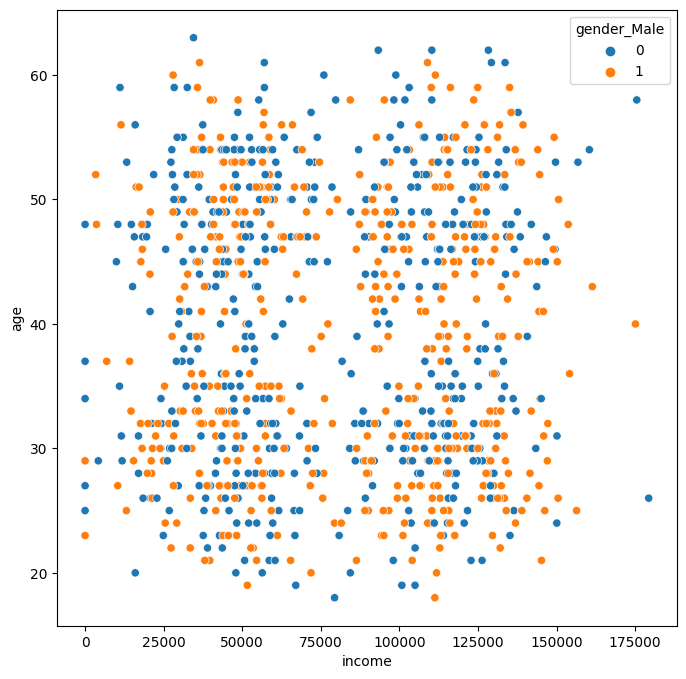

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data, x='income', y='age', hue='gender_Male')
plt.show()

In [ ]:
# Gender: Male

In [ ]:
data_male = data.where(data['gender_Male']==1, axis=0).dropna()

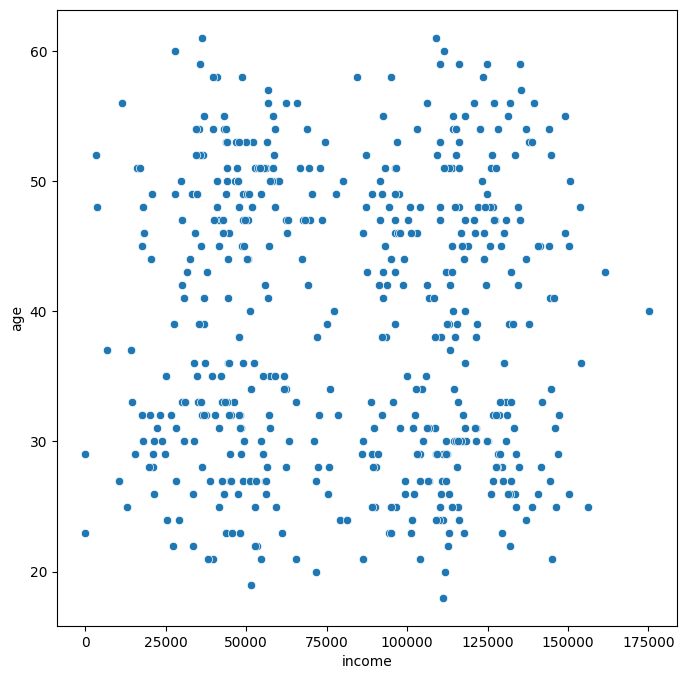

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data_male, x='income', y='age')
plt.show()

In [ ]:
data_female = data.where(data['gender_Male']==0, axis=0).dropna()

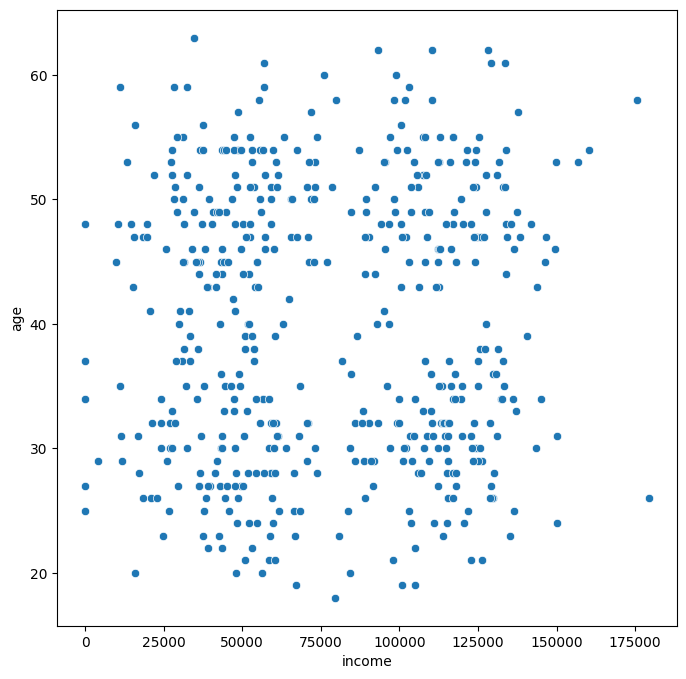

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data_female, x='income', y='age')
plt.show()

* Quan sát các sơ đồ ta thấy dữ liệu có thể phân chia thành 4 cụm.
* Áp dụng thuật toán K-means để phân cụm, có thể kiểm tra lại số cụm (k)
bằng phương pháp Elbow method

Phân cụm theo: mm_income, mm_age

In [ ]:
# prompt: # Chọn k distortions = [] # chứa WSSE tương ứng K = range(1,8) for k in K: kmeanModel = KMeans(n_clusters=k) # số cụm kmeanModel.fit(data[['mm_income', 'mm_age']]) distortions.append(sum(np.min(cdist(data[['mm_income', 'mm_age']], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data[['mm_inco

k = range(1,8)
distortions = []
for k in k:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(data[['mm_income', 'mm_age']])
  distortions.append(sum(np.min(cdist(data[['mm_income', 'mm_age']], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data[['mm_income', 'mm_age']].shape[0])
plt.plot(k, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [ ]:
# prompt: distortions = []  K = range(1,8) for k in K: kmeanModel = KMeans(n_clusters=k) # số cụm kmeanModel.fit(data[['mm_income', 'mm_age']]) distortions.append(sum(np.min(cdist(data[['mm_income', 'mm_age']], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data[['mm_incom

distortions = []
K = range(1, 8)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(data[['mm_income', 'mm_age']])
  distortions.append(sum(np.min(cdist(data[['mm_income', 'mm_age']], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data[['mm_income', 'mm_age']].shape[0])



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

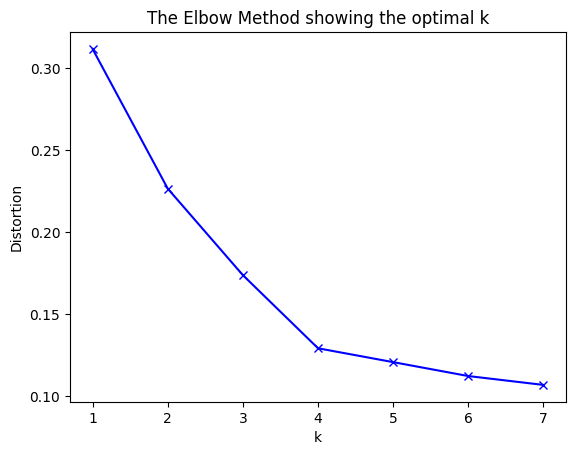

In [ ]:
# Trực quan elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Chọn k = 4 vì từ 4 lỗi giảm đi nhỏ và mịn

In [ ]:
#Áp dụng k = 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[['mm_income', 'mm_age']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print("Centroids in min-max scale:")
print(centroids)
print("Centroids in normal:")
normal_centroids = mmScaler.inverse_transform(centroids)
print(normal_centroids)
print(labels)

Centroids in min-max scale:
[[0.64257984 0.26106804]
 [0.64809667 0.6977591 ]
 [0.25925224 0.69644097]
 [0.24372937 0.25833333]]
Centroids in normal:
[[115210.70930233     29.74806202]
 [116199.84453782     49.39915966]
 [ 46482.37109375     49.33984375]
 [ 43699.21370968     29.625     ]]
[1 3 2 2 2 3 3 0 3 2 3 3 3 1 1 2 0 0 3 2 3 0 1 1 3 0 1 3 1 0 3 3 3 0 0 0 3
 3 2 1 2 2 1 0 0 0 1 1 0 3 0 2 1 3 2 3 3 3 0 3 1 2 0 0 3 0 2 0 1 0 2 0 0 1
 2 2 3 0 0 1 1 3 0 2 0 2 2 2 2 0 2 3 2 0 3 3 0 2 2 2 3 0 2 1 2 3 0 2 2 2 3
 1 1 3 0 2 1 0 3 2 1 3 0 3 2 3 0 3 3 1 0 3 2 0 1 2 0 3 1 3 2 3 2 0 3 2 1 0
 0 3 0 3 0 2 3 3 0 3 0 1 1 0 1 0 1 3 3 1 0 3 0 2 0 1 2 2 1 1 0 0 2 3 0 3 1
 0 0 1 1 0 0 2 3 3 3 3 1 0 1 2 1 2 2 3 2 1 1 2 2 2 2 2 1 1 2 3 0 3 1 2 0 0
 3 0 0 1 2 3 2 1 1 2 1 0 3 0 3 1 3 1 1 2 3 0 2 1 1 3 3 0 3 3 3 2 2 2 0 0 1
 0 0 3 1 0 3 1 1 3 0 2 2 0 3 1 1 1 3 3 1 1 1 0 3 1 0 1 2 3 2 3 3 2 1 0 3 0
 2 0 1 3 0 2 0 1 3 2 2 0 3 2 0 0 2 2 2 3 0 3 1 2 2 3 1 2 2 3 1 2 2 2 2 3 0
 0 2 3 3 3 1 1 3 0 0 2 2 3 1 3 2 3

In [ ]:
data['Group'] = pd.Series(labels)
data.head()

,income,age,gender_Male,mm_income,mm_age,Group
0,101743,58,0,0.567465,0.888889,1
1,49597,27,0,0.276624,0.200000,3
2,36517,52,1,0.203671,0.755556,2
3,33223,49,1,0.185299,0.688889,2
4,72994,53,0,0.407119,0.777778,2


In [ ]:
data.Group.value_counts()
# Trong đó mỗi nhóm có số khách hàng gần như nhau:

0    258
2    256
3    248
1    238
Name: Group, dtype: int64

In [ ]:
i=0
for cluster in normal_centroids:
  print("*** Centroid Cluster: " + str(i))
  print("Income:",round(cluster[0],2))
  print("Age:",round(cluster[1]),2)
  i = i+1

*** Centroid Cluster: 0
Income: 115210.71
Age: 30 2
*** Centroid Cluster: 1
Income: 116199.84
Age: 49 2
*** Centroid Cluster: 2
Income: 46482.37
Age: 49 2
*** Centroid Cluster: 3
Income: 43699.21
Age: 30 2


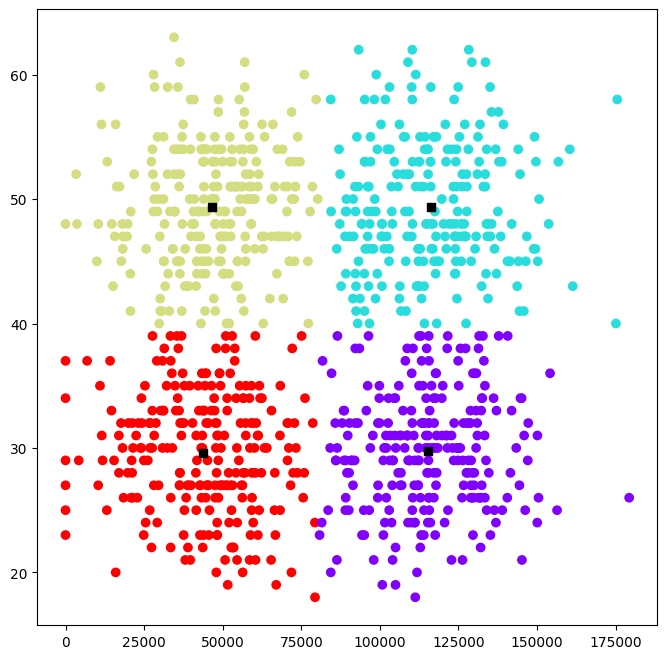

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(data.income, data.age, c= data.Group, cmap='rainbow')
plt.scatter(normal_centroids[:, 0], normal_centroids[:, 1], marker = "s",c='black')
plt.show()

Có thể chia khách hàng thành 4 nhóm

Nhóm 1: Tuổi <=40 và thu nhập <=75K

Nhóm 2: Tuổi >40 và thu nhập <=75K

Nhóm 3: Tuổi <=40 và thu nhập >75K

Nhóm 4: Tuổi >40 và thu nhập >75K

In [ ]:
# prompt: distortions = []  K = range(1,8) for k in K: kmeanModel = KMeans(n_clusters=k) # số cụm kmeanModel.fit(data[['mm_income', 'mm_age']]) distortions.append(sum(np.min(cdist(data[['mm_income', 'mm_age']], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data[['mm_incom

distortions = []
K = range(1, 8)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(data[['mm_income', 'mm_age']])
  distortions.append(sum(np.min(cdist(data[['mm_income', 'mm_age']], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data[['mm_income', 'mm_age','gender_Male']].shape[0])



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

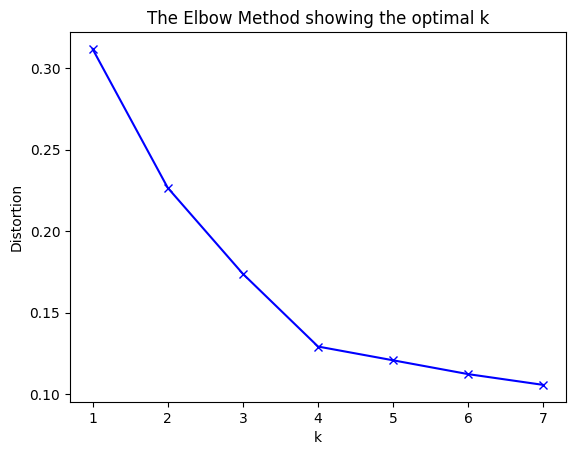

In [ ]:
# Trực quan elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Áp dụng k = 2 / hoặc k = 4
# Ví dụ: chọn k = 4
kmeans_3 = KMeans(n_clusters=4)
kmeans_3.fit(data[['mm_income', 'mm_age', 'gender_Male']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
centroids_3 = kmeans_3.cluster_centers_
labels_3 = kmeans_3.labels_
print("Centroids in min-max scale:")
print(centroids_3)
print(labels_3)

Centroids in min-max scale:
[[ 0.4705367   0.68313725  1.        ]
 [ 0.42910771  0.7040036  -0.        ]
 [ 0.45110407  0.25026042  1.        ]
 [ 0.43548329  0.26290174 -0.        ]]
[1 3 0 0 1 3 2 3 3 0 3 3 2 1 0 0 3 2 2 1 3 3 1 0 2 3 0 2 0 2 2 2 3 3 2 3 3
 3 0 0 1 0 0 3 2 2 0 0 3 3 2 0 0 3 0 3 2 3 3 3 1 1 3 3 3 3 1 3 1 0 0 2 2 1
 0 0 3 2 3 0 0 3 2 1 2 1 1 0 1 2 1 3 1 3 2 3 2 0 1 0 2 3 1 1 0 2 2 1 1 1 3
 1 0 3 2 0 0 2 2 1 0 2 2 2 0 3 2 2 3 1 3 2 0 3 0 1 2 3 1 3 1 2 0 0 2 0 0 2
 2 2 3 3 3 1 2 3 2 2 3 1 0 2 1 3 1 3 3 0 3 3 2 0 2 0 0 0 1 0 2 3 0 2 3 3 1
 2 2 1 0 2 3 1 2 3 3 2 1 3 0 1 0 0 1 3 0 0 1 1 0 1 1 0 1 0 1 3 2 2 0 1 3 3
 3 3 3 0 1 2 1 0 0 0 0 3 2 2 3 1 2 1 0 0 2 2 1 0 0 2 3 2 2 2 3 1 0 1 3 3 1
 3 2 3 1 2 2 0 1 2 3 0 1 3 2 1 1 1 3 3 1 0 0 3 2 0 2 1 0 2 0 2 2 1 0 3 3 3
 0 2 0 3 2 1 2 0 2 1 1 2 3 0 3 2 0 1 0 2 2 3 1 1 1 3 0 0 1 3 0 0 1 1 0 2 3
 2 0 2 3 3 0 0 2 2 3 0 0 2 0 2 1 3 1 3 1 0 3 2 0 3 0 0 0 0 0 1 1 3 2 0 0 2
 0 2 2 1 3 2 1 3 3 2 1 3 2 1 3 2 1 3 0 0 3 3 2 0 0 3 0 1 2 2 0 2 

In [ ]:
data['Group_3'] = pd.Series(labels_3)
data.head()

,income,age,gender_Male,mm_income,mm_age,Group,Group_3
0,101743,58,0,0.567465,0.888889,1,1
1,49597,27,0,0.276624,0.200000,3,3
2,36517,52,1,0.203671,0.755556,2,0
3,33223,49,1,0.185299,0.688889,2,0
4,72994,53,0,0.407119,0.777778,2,1


In [ ]:
data["Group_3"].value_counts()

2    256
0    255
1    247
3    242
Name: Group_3, dtype: int64

In [ ]:
for cluster in data['Group_3'].unique():
    print("Cluster: " + str(cluster))
    for col in ['income', 'age']:
        print(col + ": {:.2f}".format(data.loc[data['Group_3'] == cluster, col].mean()))


Cluster: 1
income: 76936.44
age: 49.68
Cluster: 3
income: 78079.54
age: 29.83
Cluster: 0
income: 84364.41
age: 48.74
Cluster: 2
income: 80880.25
age: 29.26


In [ ]:
from mpl_toolkits.mplot3d import axes3d

Text(0.5, 0, 'Gander')

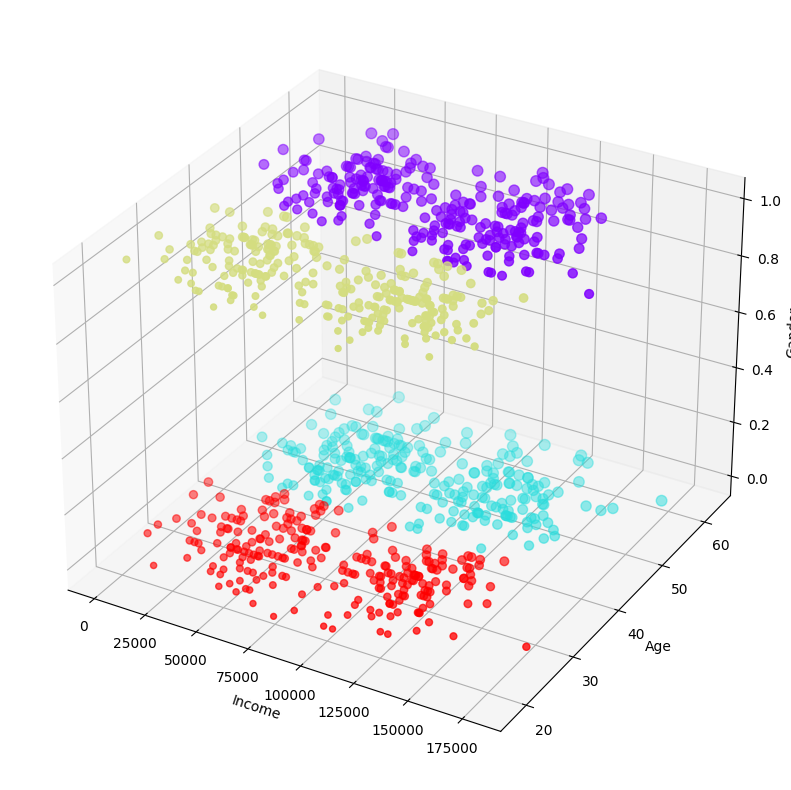

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.income, data.age, data.gender_Male, cmap='rainbow',s=data.age, c=data.Group_3 )
ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('Gander')

Kết luận: Khi kết hợp 3 yếu tố, ta thấy chỉ có 2 yếu tố ảnh hưởng là Gender và Age, ta có thể chia số nhóm là 4 nhóm như sau:

Gender = 1 (Male) và Age <= 43

Gender = 1 (Male) và Age > 43

Gender = 0 (Female) và Age <=43

Gender = 0 (Female) và Age >43

Step 5: Deployment & Feedback/ Act

Đưa ra chiến dịch quảng cáo, bán hàng, chăm sóc khách hàng phù hợp cho mỗi nhóm